In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import LeaveOneGroupOut
import warnings

In [98]:
VARIABLES = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
             'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
             'HRV', 'RESP', 'Steps', 'SkinTemperature', 'ActivityClass']

# Import data

In [99]:
# file path to data folder
path = './Output'

In [100]:
file = path + f'/combined_data.csv'
data = pd.read_csv(file, index_col=0).fillna(pd.NA)
subjects = np.unique(data['subjectID'])
N = data.shape[0]

# Model

In [101]:
np.random.seed(42) # reproducability

In [102]:
class RandomGuesser(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.random.choice([0, 1], len(X))

# Model evaluation

Physical fatigue
 Accuracy: 0.555 +- 0.209
 Balanced accuracy: 0.56 +- 0.209
 F1: 0.574 +- 0.234
 Recall: 0.555 +- 0.209
 Precision: 0.673 +- 0.288


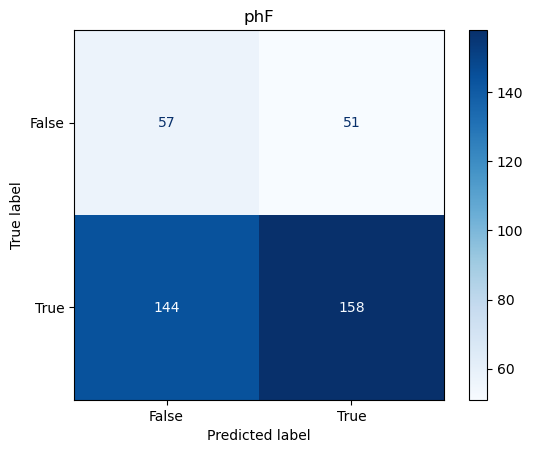

Mental fatigue
 Accuracy: 0.467 +- 0.215
 Balanced accuracy: 0.46 +- 0.23
 F1: 0.501 +- 0.231
 Recall: 0.467 +- 0.215
 Precision: 0.596 +- 0.301


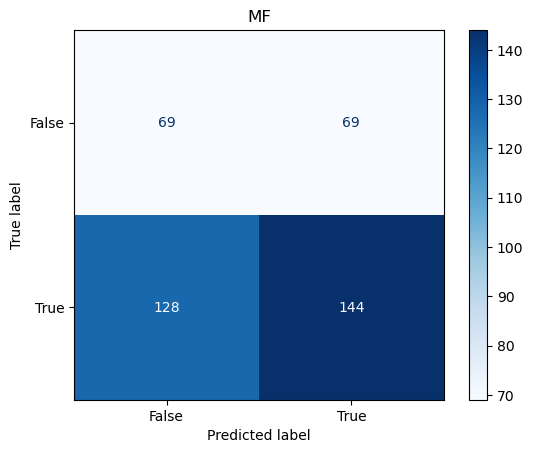

VAS score
 Accuracy: 0.502 +- 0.193
 Balanced accuracy: 0.509 +- 0.221
 F1: 0.591 +- 0.199
 Recall: 0.502 +- 0.193
 Precision: 0.792 +- 0.27


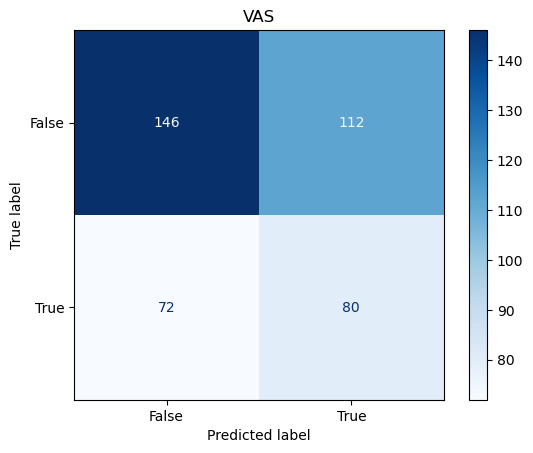

In [103]:
loso = LeaveOneGroupOut()
model = RandomGuesser()
groups = data['subjectID']

with warnings.catch_warnings():
    # ignore numpy warning
    warnings.filterwarnings('ignore')

    for variable in ('phF', 'MF', 'VAS'):
        # inputs, outputs
        X = data[VARIABLES].to_numpy()
        y = data[variable].to_numpy()

        # metrics
        accuracy, balanced_accuracy, f1, recall, precision, y_pred_flat = [], [], [], [], [], []
        for train, test in loso.split(X, y, groups):
            # train/test split
            X_train, X_test = X[train], X[test]
            y_train, y_test = y[train], y[test]

            # model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_flat += list(y_pred)

            # metrics
            accuracy.append(accuracy_score(y_test, y_pred))
            balanced_accuracy.append(balanced_accuracy_score(y_test, y_pred))
            f1.append(f1_score(y_test, y_pred, average='weighted'))
            recall.append(recall_score(y_test, y_pred, average='weighted'))
            precision.append(precision_score(y_test, y_pred, average='weighted'))

        # final evaluation
        print({'phF': 'Physical fatigue', 'MF': 'Mental fatigue', 'VAS': 'VAS score'}[variable])
        print(f' Accuracy: {round(np.mean(accuracy), 3)} +- '
              f'{round(np.std(accuracy), 3)}')
        print(f' Balanced accuracy: {round(np.mean(balanced_accuracy), 3)} +- '
              f'{round(np.std(balanced_accuracy), 3)}')
        print(f' F1: {round(np.mean(f1), 3)} +- '
              f'{round(np.std(f1), 3)}')
        print(f' Recall: {round(np.mean(recall), 3)} +- '
              f'{round(np.std(recall), 3)}')
        print(f' Precision: {round(np.mean(precision), 3)} +- '
              f'{round(np.std(precision), 3)}')

        confusion = confusion_matrix(y_pred=y_pred_flat, y_true=data[variable])
        metrics.ConfusionMatrixDisplay(confusion_matrix=confusion,
                                       display_labels=[False, True]).plot(cmap=plt.cm.Blues)
        plt.title(variable)
        plt.show()